Gravity Model
=======

The gravity model is the workhorse of emperical international trade analysis. It is originally based around the idea of gravitational force:

$Export_{ij} = \frac{GDP_i * GDP_j}{Distance_{ij}}$

Estimating this using ordinary least squares requires linearizing the model:

$\log{Export_{ij}} = \log{GDP_i} + \log{GDP_j} - \log(Distance_{ij})$

In its most basic form distance is the physical distance between two countries. 
However in reality there are many sources of ``distance`` that are associated with the cost of trade such as landlockedness that can be added into the regression as additional explanatory variables.

Data
-----
Trade data is sourced from: http://atlas.media.mit.edu/en/resources/data/. And uses the SITC rev 2. product level trade dataset. This product level data is aggregated to form a bilateral trade dataset at the country level.

Distance and Geography is sourced from CEPII: http://www.cepii.fr/CEPII/en/bdd_modele/presentation.asp?id=6

GDP and Population statistics are from the World Development Indicators: http://data.worldbank.org/data-catalog/world-development-indicators

In [36]:
import pandas as pd
import statsmodels.formula.api as smf
from numpy import log

Import Data from a ``csv`` data file for the year 2013

In [37]:
data = pd.read_csv("./data/gravity_dataset_2013.csv")

In [38]:
data.head()

,year,iiso3c,eiso3c,value,contig,comlang_off,colony,dist,distcap,distw,distwces,ell,ill,egdp,egdppc,epop,igdp,igdppc,ipop
0,2013,ABW,BEL,774353,0,1,0,7847.070,7847.070,7843.255,7843.006,0,0,4.204710e+11,37599.735498,11182817,NaN,NaN,102921
1,2013,ABW,BHS,4712537,0,0,0,1588.515,1588.515,1634.515,1628.143,0,0,7.835118e+09,20736.547344,377841,NaN,NaN,102921
2,2013,ABW,CHE,17812626,0,0,0,8056.332,8056.332,8074.21,8073.511,1,0,4.772463e+11,58996.896141,8089346,NaN,NaN,102921
3,2013,ABW,CHN,25319168,0,0,0,14155.350,14155.350,14590.92,14560.28,0,0,4.912954e+12,3619.439108,1357380000,NaN,NaN,102921
4,2013,ABW,COL,22160086,0,1,0,1036.634,1036.634,929.5887,861.2452,0,0,2.129079e+11,4497.196936,47342363,NaN,NaN,102921


Description of the Data

In [39]:
data.describe()

,year,value,contig,comlang_off,colony,dist,distcap,ell,ill,egdp,egdppc,epop,igdp,igdppc,ipop
count,26886,2.549100e+04,26886.000000,26886.000000,26886.000000,26886.000000,26886.000000,26886.000000,26886.000000,2.544700e+04,25447.000000,2.688600e+04,2.618400e+04,26184.000000,2.688600e+04
mean,2013,9.902996e+08,0.020494,0.157033,0.015696,7700.812375,7667.895301,0.172432,0.171799,4.728611e+11,12217.536595,4.532196e+07,5.963956e+11,14242.164850,5.475265e+07
std,0,8.747958e+09,0.141685,0.363839,0.124298,4454.436588,4453.037401,0.377762,0.377213,1.715557e+12,16554.072884,1.484285e+08,1.920917e+12,17643.256626,1.678096e+08
min,2013,1.000000e+00,0.000000,0.000000,0.000000,8.300385,8.300385,0.000000,0.000000,2.620733e+07,150.744900,9.876000e+03,1.203875e+08,150.744900,2.091900e+04
25%,2013,1.034865e+05,0.000000,0.000000,0.000000,4221.304000,4153.092750,0.000000,0.000000,8.204074e+09,1122.482815,2.897366e+06,1.303300e+10,1467.611736,3.872684e+06
50%,2013,3.715586e+06,0.000000,0.000000,0.000000,7291.663000,7264.896000,0.000000,0.000000,3.150948e+10,4497.196936,1.028141e+07,5.823843e+10,5896.096631,1.088650e+07
75%,2013,8.051373e+07,0.000000,0.000000,0.000000,10738.990000,10693.975000,0.000000,0.000000,2.124327e+11,15447.307422,3.378138e+07,3.237434e+11,22152.412473,4.369288e+07
max,2013,4.220679e+11,1.000000,1.000000,1.000000,19812.040000,19812.040000,1.000000,1.000000,1.445151e+13,79511.205382,1.357380e+09,1.445151e+13,79511.205382,1.357380e+09


In [40]:
data.columns

Index([u'year', u'iiso3c', u'eiso3c', u'value', u'contig', u'comlang_off',
       u'colony', u'dist', u'distcap', u'distw', u'distwces', u'ell', u'ill',
       u'egdp', u'egdppc', u'epop', u'igdp', u'igdppc', u'ipop'],
      dtype='object')

Estimate the basic gravity model

In [41]:
model1 = smf.ols("log(value) ~ log(egdp) + log(igdp) + log(dist)", data)
result1 = model1.fit()
result1 = result1.get_robustcov_results()
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:             log(value)   R-squared:                       0.669
Model:                            OLS   Adj. R-squared:                  0.669
Method:                 Least Squares   F-statistic:                 1.551e+04
Date:                Tue, 03 Nov 2015   Prob (F-statistic):               0.00
Time:                        16:44:21   Log-Likelihood:                -56160.
No. Observations:               23545   AIC:                         1.123e+05
Df Residuals:                   23541   BIC:                         1.124e+05
Df Model:                           3                                         
Covariance Type:                  HC1                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    -30.6140      0.344    -89.031      0.0

In [42]:
#-Write LateX Table-#
summ = result1.summary()
print(summ.as_latex())

\begin{center}
\begin{tabular}{lclc}
\toprule
\textbf{Dep. Variable:}    &    log(value)    & \textbf{  R-squared:         } &     0.669   \\
\textbf{Model:}            &       OLS        & \textbf{  Adj. R-squared:    } &     0.669   \\
\textbf{Method:}           &  Least Squares   & \textbf{  F-statistic:       } & 1.551e+04   \\
\textbf{Date:}             & Tue, 03 Nov 2015 & \textbf{  Prob (F-statistic):} &     0.00    \\
\textbf{Time:}             &     16:44:21     & \textbf{  Log-Likelihood:    } &   -56160.   \\
\textbf{No. Observations:} &       23545      & \textbf{  AIC:               } & 1.123e+05   \\
\textbf{Df Residuals:}     &       23541      & \textbf{  BIC:               } & 1.124e+05   \\
\textbf{Df Model:}         &           3      & \textbf{                     } &             \\
\bottomrule
\end{tabular}
\begin{tabular}{lccccc}
                   & \textbf{coef} & \textbf{std err} & \textbf{t} & \textbf{P$>$$|$t$|$} & \textbf{[95.0\% Conf. Int.]}  \\
\midrule
\t

In [43]:
#-Write LatexTable to File-#
with open("./model1_result_summary.tex", 'w') as f:
    f.write(summ.as_latex())

Estimate the Model with some additional explanatory variables

In [44]:
#-Model with additional Explanatory Variables-#
model2 = smf.ols("log(value) ~ log(egdp) + log(igdp) + log(dist)+\
                  contig + comlang_off + colony + ell + ill", data)
result2 = model2.fit()
result2 = result2.get_robustcov_results()
print(result2.summary())

                            OLS Regression Results                            
Dep. Variable:             log(value)   R-squared:                       0.683
Model:                            OLS   Adj. R-squared:                  0.683
Method:                 Least Squares   F-statistic:                     6322.
Date:                Tue, 03 Nov 2015   Prob (F-statistic):               0.00
Time:                        16:44:21   Log-Likelihood:                -55642.
No. Observations:               23545   AIC:                         1.113e+05
Df Residuals:                   23536   BIC:                         1.114e+05
Df Model:                           8                                         
Covariance Type:                  HC1                                         
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
Intercept     -30.8815      0.347    -89.065      

Estimating the model with GDPPC instead of GDP

Plot
----

A plot of components of the basic model

In [45]:
%matplotlib inline

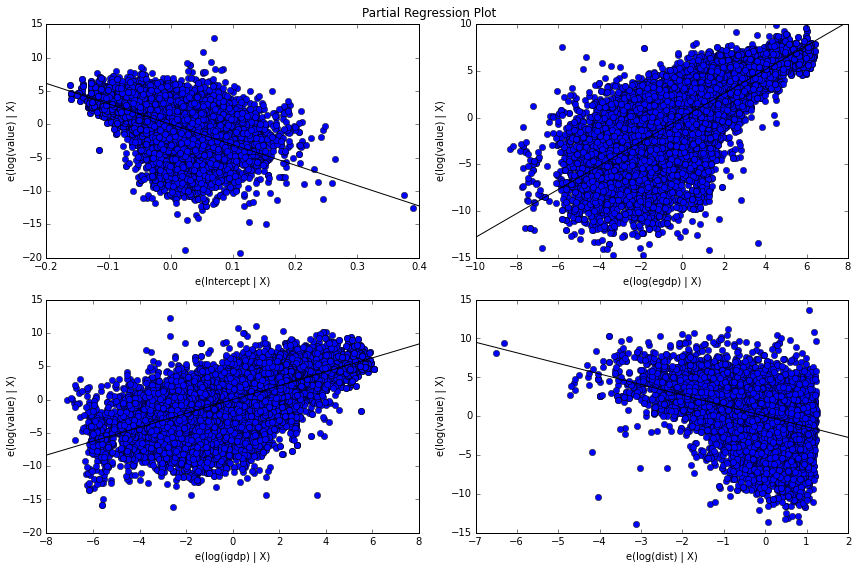

In [46]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(result1, fig=fig)

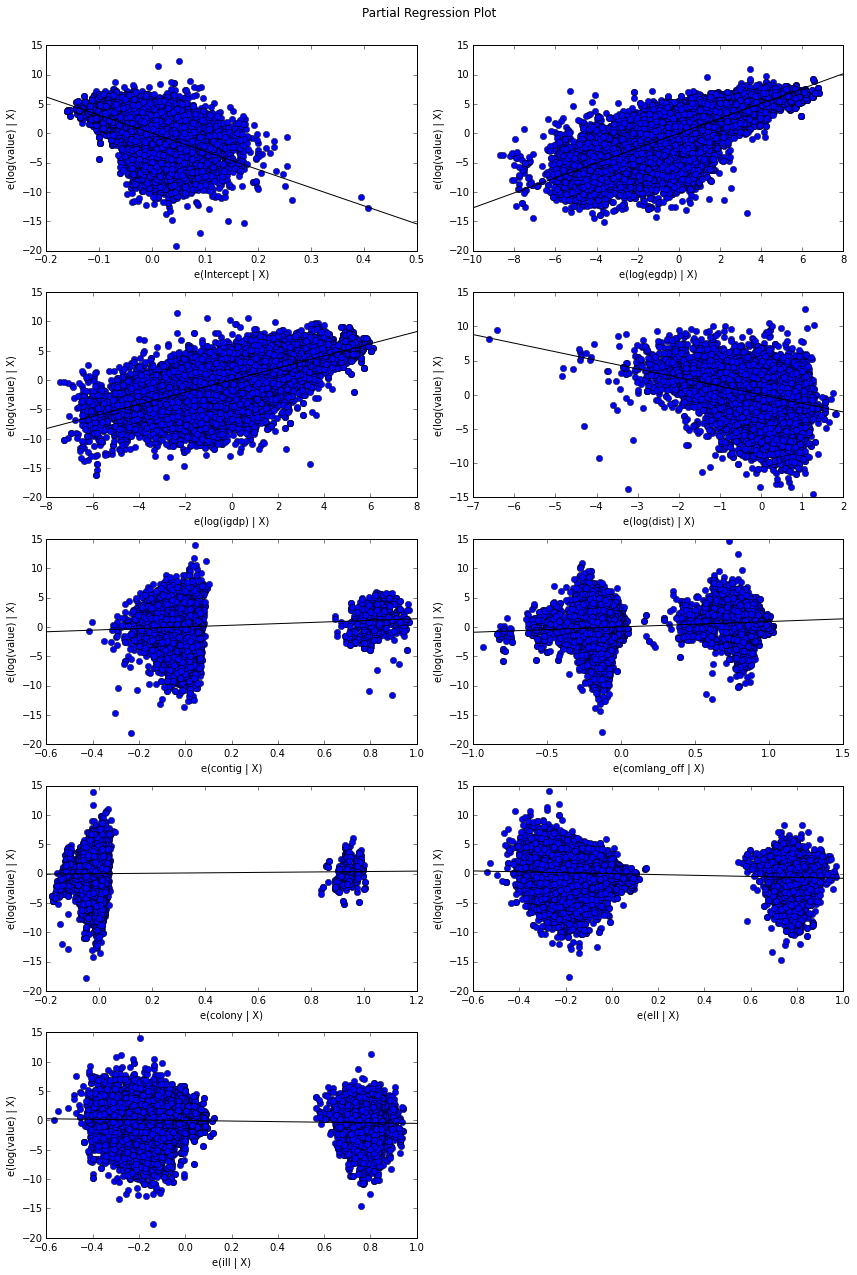

In [47]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
fig = plt.figure(figsize=(12,18))
fig = sm.graphics.plot_partregress_grid(result2, fig=fig)

Additional Specifications
-----------------------------

- model1b includes population size of exporter and importer
- model3 uses gdppc in place of gdp

In [48]:
model1b = smf.ols("log(value) ~ log(egdp) + log(epop) + log(igdp) + log(ipop) + log(dist)", data)
result1b = model1b.fit()
result1b = result1b.get_robustcov_results()
print(result1b.summary())

                            OLS Regression Results                            
Dep. Variable:             log(value)   R-squared:                       0.671
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     9665.
Date:                Tue, 03 Nov 2015   Prob (F-statistic):               0.00
Time:                        16:44:24   Log-Likelihood:                -56089.
No. Observations:               23545   AIC:                         1.122e+05
Df Residuals:                   23539   BIC:                         1.122e+05
Df Model:                           5                                         
Covariance Type:                  HC1                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    -30.6831      0.344    -89.250      0.0

In [49]:
#-Model with additional Explanatory Variables-#
model3 = smf.ols("log(value) ~ log(egdppc) + log(igdppc) + log(dist)+\
                  contig + comlang_off + colony + ell + ill", data)
result3 = model3.fit()
result3 = result3.get_robustcov_results()
print(result3.summary())

                            OLS Regression Results                            
Dep. Variable:             log(value)   R-squared:                       0.264
Model:                            OLS   Adj. R-squared:                  0.264
Method:                 Least Squares   F-statistic:                     1371.
Date:                Tue, 03 Nov 2015   Prob (F-statistic):               0.00
Time:                        16:44:24   Log-Likelihood:                -65569.
No. Observations:               23545   AIC:                         1.312e+05
Df Residuals:                   23536   BIC:                         1.312e+05
Df Model:                           8                                         
Covariance Type:                  HC1                                         
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
Intercept      10.8041      0.372     29.075      